In [1]:
from pandas import Series, DataFrame
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names=['sepal-len', 'sepal-wid', 'petal-len', 'petal-wid', 'name'])
df.tail()

,sepal-len,sepal-wid,petal-len,petal-wid,name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [14]:
# WANT: compare sepal len to sepal wid for Iris-virginica
# APPROACH: scatter

In [15]:
irises = df[df["name"] == "Iris-virginica"]
len(irises)

50

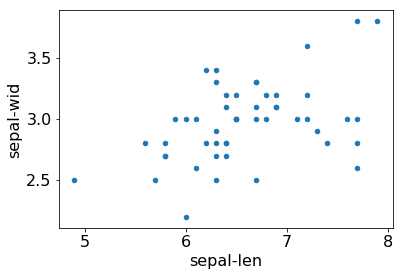

In [17]:
irises.plot.scatter(x="sepal-len", y="sepal-wid")

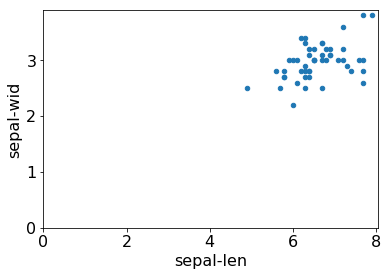

In [20]:
# use xlim and ylim params (ints give lower bounds)
irises.plot.scatter(x="sepal-len", y="sepal-wid", xlim=0, ylim=0)

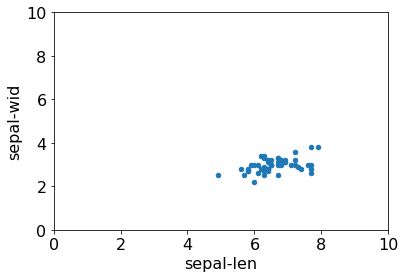

In [21]:
# use xlim and ylim params (tuples give ranges)
limits = (0, 10)
irises.plot.scatter(x="sepal-len", y="sepal-wid", xlim=limits, ylim=limits)

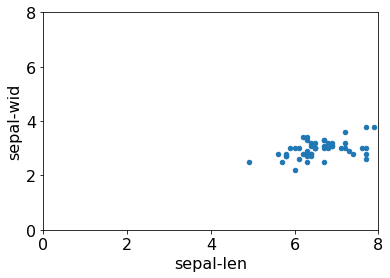

In [33]:
# use xlim and ylim params (tuples give ranges)
limits = (0, 8)
ax = irises.plot.scatter(x="sepal-len", y="sepal-wid", xlim=limits, ylim=limits)

# way 1: two asserts (per axis)
assert df[ax.get_xlabel()].max() <= limits[1]
assert limits[0] <= df[ax.get_xlabel()].min()
assert df[ax.get_ylabel()].max() <= limits[1]
assert limits[0] <= df[ax.get_ylabel()].min()

# way 2: use an and
assert (limits[0] <= df[ax.get_xlabel()].min()
        and df[ax.get_xlabel()].max() <= limits[1])
assert (limits[0] <= df[ax.get_ylabel()].min()
        and df[ax.get_ylabel()].max() <= limits[1])

# way 3: just inequalities
assert (limits[0] <= df[ax.get_xlabel()].min()
        <= df[ax.get_xlabel()].max() <= limits[1])
assert (limits[0] <= df[ax.get_ylabel()].min()
        <= df[ax.get_ylabel()].max() <= limits[1])

In [34]:
import math

In [36]:
math.log10(121212121212121)

14.083546051450075

In [38]:
s = Series([10, 1000000, 999, 555555555, 234234])
s

0           10
1      1000000
2          999
3    555555555
4       234234
dtype: int64

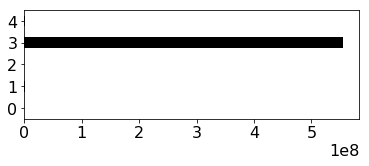

In [45]:
s.plot.barh(color="black", figsize=(6,2))

In [41]:
for y in reversed(s.index):
    x = s[y]
    print(str(y) + ": " + str(x))

4: 234234
3: 555555555
2: 999
1: 1000000
0: 10


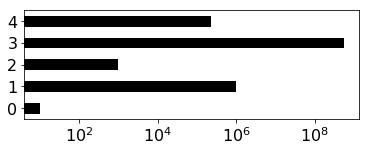

In [46]:
s.plot.barh(color="black", figsize=(6,2), logx=True)

In [54]:
sp500 = pd.read_csv("sp500.csv").set_index("year")
sp500.head()

,return
year,
1970,1.0401
1971,1.1431
1972,1.1898
1973,0.8534
1974,0.7353


In [55]:
networth = 1000 * sp500["return"].cumprod()
networth.tail()

year
2013     77789.897598
2014     88439.334579
2015     89659.797397
2016    100383.109165
2017    122296.741896
Name: return, dtype: float64

Text(0, 0.5, 'Net Worth ($)')

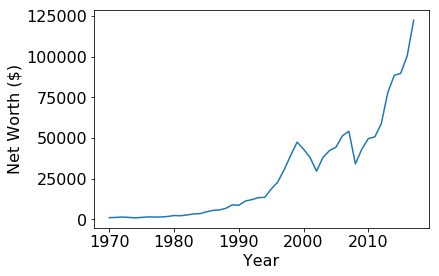

In [57]:
ax = networth.plot.line()
ax.set_xlabel("Year")
ax.set_ylabel("Net Worth ($)")

Text(0, 0.5, 'Net Worth ($)')

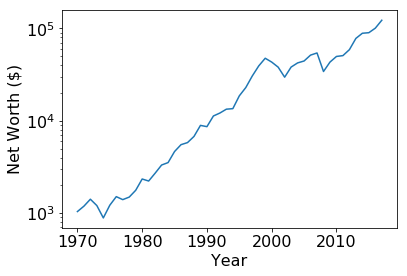

In [58]:
ax = networth.plot.line(logy=True)
ax.set_xlabel("Year")
ax.set_ylabel("Net Worth ($)")

In [60]:
from matplotlib import pyplot as plt

(<Figure size 432x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x11911f710>,
       dtype=object))

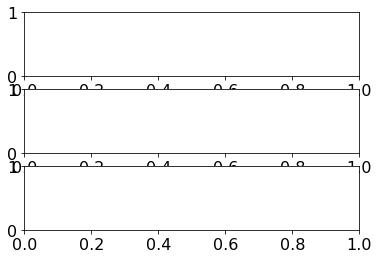

In [61]:
plt.subplots(nrows=3)

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x11904ea58>,
       dtype=object))

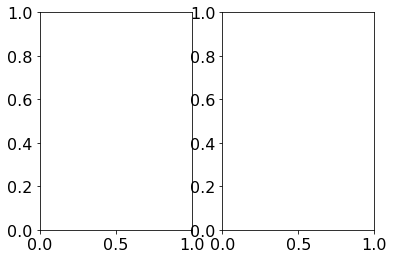

In [62]:
plt.subplots(ncols=2)

(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11909d8d0>,
       dtype=object))

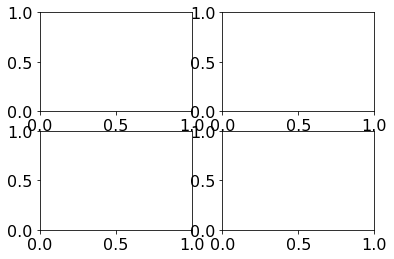

In [63]:
plt.subplots(ncols=2, nrows=2)

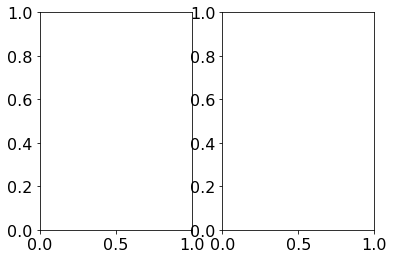

In [68]:
t = plt.subplots(ncols=2)
# type(t) is a tuple
# t[0] is a Figure
# t[1] is a "list" of AxesSuplot areas
# t[1][0] is the left one
# t[1][1] is the right one

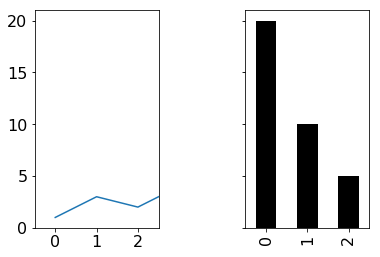

In [80]:
s1 = Series([1,3,2,4,5])
s2 = Series([20,10,5])

t = plt.subplots(ncols=2, sharex=True, sharey=True)
left_ax = t[1][0]
right_ax = t[1][1]

s1.plot.line(ax=left_ax)
s2.plot.bar(ax=right_ax, color="black")

plt.subplots_adjust(wspace=0.7)